### 1.Import numpy and pandas and load data file named 'test_Y3wMUE5_7gLdaTN.csv' as test



In [125]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [126]:
data=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### 2.Print list of column names


In [127]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### 3.Types of data columns


In [128]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### 4.Summary statistics


In [129]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### DATA CLEANING AND PREPROCESSING

### 5.Find missing values

In [130]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [131]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### 6.Impute missing values with mean (numerical variables)


In [132]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [133]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)

In [134]:
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

In [135]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

### 7.Impute missing values with mode (categorical variables)


In [136]:
data['Gender'].fillna(data['Gender'].mode().iloc[0], inplace=True)

In [137]:
data['Dependents'].fillna(data['Dependents'].mode().iloc[0], inplace=True)

In [138]:
data['Self_Employed'].fillna(data['Self_Employed'].mode().iloc[0], inplace=True)

In [139]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### 8.Remove irrelevant columns Loan_ID variable - Irrelevant from test and train data



In [140]:
data.drop('Loan_ID', axis=1, inplace=True)

In [141]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


### 9.Build dummy variables for categorical variables



In [142]:
Gender = pd.get_dummies(data['Gender'],drop_first=True)
Education = pd.get_dummies(data['Education'],drop_first=True)
Property_Area = pd.get_dummies(data['Property_Area'],drop_first=True)
data.drop(['Gender','Education','Property_Area', 'Married','Self_Employed', 'Dependents'],axis=1,inplace=True)
data = pd.concat([data,Gender,Education,Property_Area,],axis=1)
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Not Graduate,Semiurban,Urban
0,5720,0,110.0,360.0,1.000000,1,0,0,1
1,3076,1500,126.0,360.0,1.000000,1,0,0,1
2,5000,1800,208.0,360.0,1.000000,1,0,0,1
3,2340,2546,100.0,360.0,0.825444,1,0,0,1
4,3276,0,78.0,360.0,1.000000,1,1,0,1


### 10.Get x as columns of ApplicantIncome and Credit_History


In [143]:
X=data[['ApplicantIncome', 'Credit_History']]

In [144]:
X=np.array(X)
X

array([[5.72000000e+03, 1.00000000e+00],
       [3.07600000e+03, 1.00000000e+00],
       [5.00000000e+03, 1.00000000e+00],
       [2.34000000e+03, 8.25443787e-01],
       [3.27600000e+03, 1.00000000e+00],
       [2.16500000e+03, 1.00000000e+00],
       [2.22600000e+03, 1.00000000e+00],
       [3.88100000e+03, 0.00000000e+00],
       [1.36330000e+04, 1.00000000e+00],
       [2.40000000e+03, 1.00000000e+00],
       [3.09100000e+03, 1.00000000e+00],
       [2.18500000e+03, 1.00000000e+00],
       [4.16600000e+03, 8.25443787e-01],
       [1.21730000e+04, 0.00000000e+00],
       [4.66600000e+03, 1.00000000e+00],
       [5.66700000e+03, 1.00000000e+00],
       [4.58300000e+03, 1.00000000e+00],
       [3.78600000e+03, 1.00000000e+00],
       [9.22600000e+03, 1.00000000e+00],
       [1.30000000e+03, 1.00000000e+00],
       [1.88800000e+03, 1.00000000e+00],
       [2.08300000e+03, 1.00000000e+00],
       [3.90900000e+03, 1.00000000e+00],
       [3.76500000e+03, 1.00000000e+00],
       [5.400000

### 11.Import matplotlib


### 12.Elbow method to determine K


In [145]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[8826028226.821066,
 3923519733.7950945,
 1836441821.241959,
 876634961.5192982,
 505265913.7554704,
 270702425.9966822,
 192373911.36168078,
 151203601.59573036,
 124491110.93554258,
 104261586.46617077]

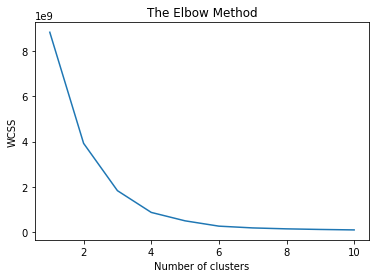

In [146]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 13.fit K_means with founded K



In [147]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 3, 3, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 0, 3, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 0, 2, 2, 2, 4, 0, 2, 2, 0, 0, 2, 4, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,

### 14.show cluster results


In [148]:
X[y_kmeans==0]

array([[5.72000000e+03, 1.00000000e+00],
       [5.66700000e+03, 1.00000000e+00],
       [9.22600000e+03, 1.00000000e+00],
       [5.40000000e+03, 1.00000000e+00],
       [7.50000000e+03, 1.00000000e+00],
       [6.25000000e+03, 1.00000000e+00],
       [7.35000000e+03, 1.00000000e+00],
       [5.83300000e+03, 1.00000000e+00],
       [5.62900000e+03, 1.00000000e+00],
       [6.50000000e+03, 1.00000000e+00],
       [6.79200000e+03, 1.00000000e+00],
       [8.00000000e+03, 1.00000000e+00],
       [5.29300000e+03, 1.00000000e+00],
       [7.01600000e+03, 1.00000000e+00],
       [7.66600000e+03, 1.00000000e+00],
       [6.35600000e+03, 1.00000000e+00],
       [7.95000000e+03, 1.00000000e+00],
       [8.44900000e+03, 1.00000000e+00],
       [6.26000000e+03, 1.00000000e+00],
       [9.71900000e+03, 1.00000000e+00],
       [6.83500000e+03, 8.25443787e-01],
       [6.50000000e+03, 0.00000000e+00],
       [7.50000000e+03, 1.00000000e+00],
       [6.79400000e+03, 0.00000000e+00],
       [8.703000

In [149]:
X[y_kmeans==0,0]

array([ 5720.,  5667.,  9226.,  5400.,  7500.,  6250.,  7350.,  5833.,
        5629.,  6500.,  6792.,  8000.,  5293.,  7016.,  7666.,  6356.,
        7950.,  8449.,  6260.,  9719.,  6835.,  6500.,  7500.,  6794.,
        8703.,  5900.,  5823.,  7895.,  5583., 10166.,  9167.,  7874.,
       10000.,  5833.,  8706.,  5333.,  5384.,  5708.,  7830.,  7600.,
        6166., 10000.,  5833.,  5667.,  6500.,  5769.,  5530.,  9000.,
       10000.,  8750.,  8333.,  6478.,  7500.,  6300.,  7500.,  6825.,
        5314.,  7859.,  5333.,  6958.,  5509.,  9699.,  6858.,  8334.,
        8667.,  5817.,  5316.,  7603.,  8550.,  9200.])

### 15.print cluster centers


In [150]:
kmeans.cluster_centers_

array([[7.12821127e+03, 8.79948329e-01],
       [7.25290000e+04, 1.00000000e+00],
       [3.32239643e+03, 8.10038039e-01],
       [1.40656667e+04, 8.18786982e-01],
       [2.86546667e+04, 9.41814596e-01]])

### 16.Lets plot those clusters!


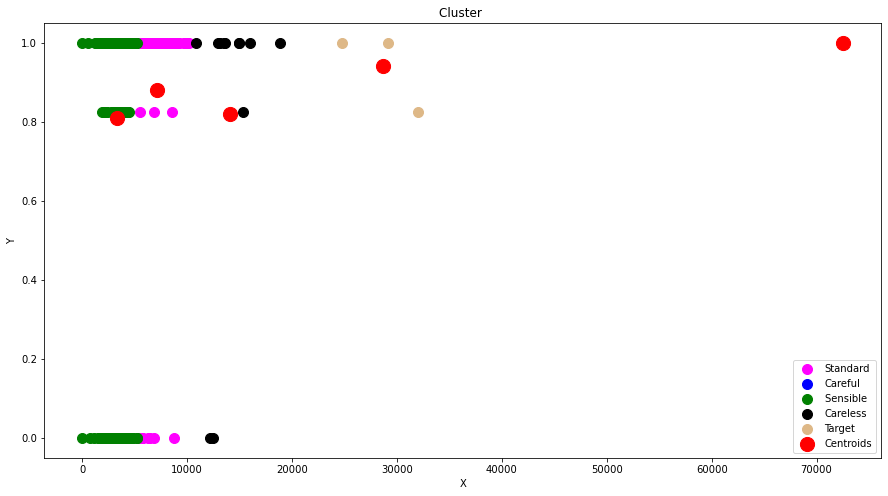

In [151]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Careful')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Sensible ')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Target')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster ')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


### 17.Create dendogram



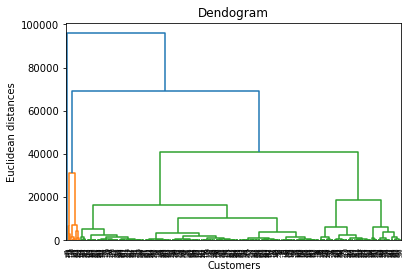

In [152]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### 18.Fit agglomerative hierarchical clustering



In [153]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

### 19.Lets plot those clusters!



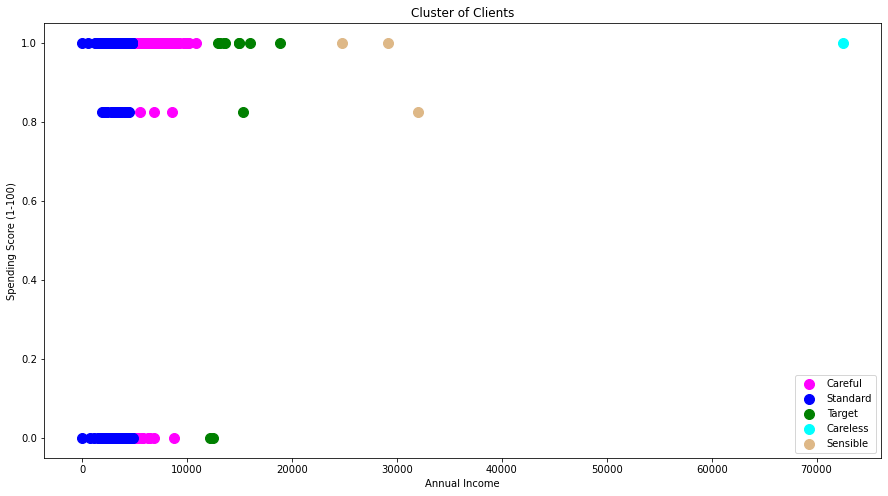

In [154]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='burlywood',label='Sensible')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()